In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics, model_selection
from sklearn.neural_network import MLPClassifier




In [3]:
df = pd.read_csv(DATOS_DIR + 'iris.csv')
nomClases = pd.unique(df['class'])

df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
Y = np.array(df.iloc[:,-1])

#le = preprocessing.LabelEncoder()
#Y = le.fit_transform(Y)

# creating instance of one-hot-encoder
#enc = preprocessing.OneHotEncoder(handle_unknown='ignore')# passing bridge-types-cat column (label encoded values of bridge_types)
#Y = enc.fit_transform(Y.reshape(-1,1)).toarray()


In [5]:
entradas = X.shape[1]
ocultas = 2

#-- la red tendrá una salida para cada tipo de flor
salidas = len(np.unique(Y))
print("entradas = %d ; salidas = %d" % (entradas, salidas))

entradas = 4 ; salidas = 3


In [6]:
Y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [7]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.30)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    

In [8]:
Y_train[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [9]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(2,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    activation='tanh')

history = clf.fit(X_train,Y_train)

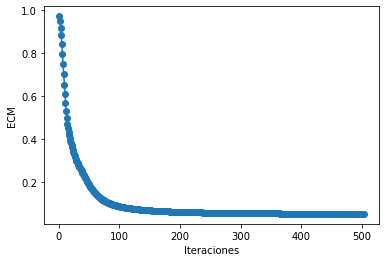

In [10]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [11]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

% aciertos X_train : 0.981


In [12]:
Y_pred[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [13]:
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

Confusion matrix Training:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.97      0.97      0.97        34
 Iris-virginica       0.97      0.97      0.97        33

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105



In [14]:
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix:
[[38  0  0]
 [ 0 33  1]
 [ 0  1 32]]


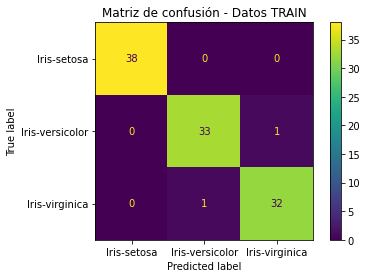

In [15]:
fig=metrics.plot_confusion_matrix(clf, X_train, Y_train) 
plt.title("Matriz de confusión - Datos TRAIN") 
plt.show()

% aciertos X_test : 0.978

Confusion matrix Test:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix:
[[12  0  0]
 [ 0 15  1]
 [ 0  0 17]]


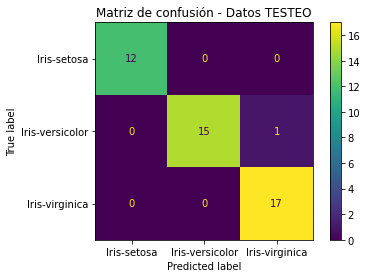

In [16]:
# -- TESTING ---
Y_pred= clf.predict(X_test)
print("%% aciertos X_test : %.3f\n" % metrics.accuracy_score(Y_test,Y_pred))

report = metrics.classification_report(Y_test, Y_pred)
print("Confusion matrix Test:\n%s" % report) 

MM = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n%s" % MM)

fig=metrics.plot_confusion_matrix(clf, X_test, Y_test)  
plt.title("Matriz de confusión - Datos TESTEO")
plt.show()

In [17]:
history.loss_curve_

[0.9729333902576508,
 0.9503927368997329,
 0.9199684310785649,
 0.8834236493910567,
 0.8420766517078125,
 0.7970871998775481,
 0.7497386152721359,
 0.7015469801267121,
 0.6541707649362853,
 0.6092022909823754,
 0.5679557940942869,
 0.5313232811247065,
 0.49971405226964305,
 0.4730717669709492,
 0.45095662000344783,
 0.43267017285943027,
 0.4173928265842101,
 0.4043068130580728,
 0.3926881449207912,
 0.3819623073573396,
 0.371726445139444,
 0.3617448081220161,
 0.3519253784200162,
 0.34228520559232906,
 0.3329109389541697,
 0.32391987337283673,
 0.3154257088470663,
 0.3075121499239214,
 0.3002163274750035,
 0.29352272942127505,
 0.28736692781023937,
 0.2816470904351969,
 0.2762403323332556,
 0.27102058228493675,
 0.26587483676048623,
 0.2607153432550466,
 0.25548624047534807,
 0.2501643168759592,
 0.24475464429985583,
 0.2392826950927877,
 0.23378498606104015,
 0.22830024089223186,
 0.222862594162614,
 0.21749765566012502,
 0.21222152507900616,
 0.20704225708656274,
 0.20196290455982588